### numpy project
#### 인서울 현상을 부추기는 문화생활 변화
- 지방과 서울경기간 문화시설 격차 확인

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from matplotlib.ticker import ScalarFormatter

In [3]:
pd.DataFrame(pd.read_csv('./data/문화시설_20250301221934.csv'))

,소재지(시군구)별(1),시점,계,계.1,공연장,공연장.1,박물관,박물관.1,미술관,미술관.1,...,문화예술진흥시설,문화예술진흥시설.1,전시시설,전시시설.1,국제회의시설,국제회의시설.1,공공도서관,공공도서관.1,전문도서관,전문도서관.1
0,소재지(시군구)별(1),시점,시설수 (개),면적 (㎡),시설수 (개),면적 (㎡),시설수 (개),면적 (㎡),시설수 (개),면적 (㎡),...,시설수 (개),면적 (㎡),시설수 (개),면적 (㎡),시설수 (개),면적 (㎡),시설수 (개),면적 (㎡),시설수 (개),면적 (㎡)
1,전국,2005,217,5265770,28,464098,27,784367,10,212871,...,133,3329942,-,-,-,-,-,-,-,-
2,전국,2006,257,5802980,30,547452,31,892946,15,219408,...,160,3659104,-,-,-,-,-,-,-,-
3,전국,2007,284,7038276,30,409103,32,1025552,15,256800,...,191,4955200,-,-,-,-,-,-,-,-
4,전국,2008,338,9001116,21,344149,33,841919,16,255284,...,257,7112906,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,제주특별자치도,2019,12,2199305,-,-,-,-,-,-,...,5,1747487,-,-,-,-,-,-,-,-
332,제주특별자치도,2020,12,2199305,-,-,-,-,-,-,...,5,1747487,-,-,-,-,-,-,-,-
333,제주특별자치도,2021,13,2239094,-,-,-,-,-,-,...,5,1747487,-,-,-,-,-,-,-,-
334,제주특별자치도,2022,13,2239094,-,-,-,-,-,-,...,5,1747487,-,-,-,-,-,-,-,-


In [4]:
popDF = pd.DataFrame(pd.read_csv('./data/행정구역_시군구_별__성별_인구수_20250302145443.csv'))
popDF.columns = ['region','years','total','male','female']
popDF.head()

,region,years,total,male,female
0,전국,2010,50515666.0,25310385.0,25205281.0
1,전국,2011,50734284.0,25406934.0,25327350.0
2,전국,2012,50948272.0,25504060.0,25444212.0
3,전국,2013,51141463.0,25588336.0,25553127.0
4,전국,2014,51327916.0,25669296.0,25658620.0


In [5]:
facDF = pd.DataFrame(pd.read_csv('./data/박물관_및_미술관수_20250301220225.csv'))

In [6]:
pd.DataFrame(pd.read_csv('./data/17개_시도별_전시_건수_및_평균_전시_기간_시각_융합__20250301220749.csv'))

,행정구역별(1),시점,계,계.1,시각예술,시각예술.1,융합,융합.1,융합.2,융합.3,융합.4,융합.5,융합.6,융합.7
0,행정구역별(1),시점,소계,소계,소계,소계,소계,소계,융합(+공연예술),융합(+공연예술),융합(+문학),융합(+문학),융합(+공연예술문학),융합(+공연예술문학)
1,행정구역별(1),시점,전시건수 (건),평균전시기간 (일),전시건수 (건),평균전시기간 (일),전시건수 (건),평균전시기간 (일),전시건수 (건),평균전시기간 (일),전시건수 (건),평균전시기간 (일),전시건수 (건),평균전시기간 (일)
2,전국,2015,13207,22.0,13195,21.9,-,-,12,40.8,-,-,-,-
3,전국,2016,13260,24.5,13149,24.4,111,29.2,29,24.1,78,27.4,4,100.5
4,전국,2017,14619,22.6,14218,22.7,401,18.2,74,15.6,318,18.8,9,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,제주특별자치도,2018,296,33.7,293,33.4,3,68.0,0,0.0,3,68.0,0,0.0
142,제주특별자치도,2019,358,39.7,357,39.7,1,24.0,1,24.0,0,0.0,0,0.0
143,제주특별자치도,2020,201,123.3,200,123.8,1,19.0,1,19.0,0,0.0,0,0.0
144,제주특별자치도,2021,283,39.6,283,39.6,0,0.0,0,0.0,0,0.0,0,0.0


In [7]:
facDF.head(5)
facDF.columns = ['region', 'years', 'museum','museum_pub','museum_pri','museum_col', 'gallery', 'gallery_pu', 'gallery_pr', 'gallery_col']
facDF = facDF.drop(0)

In [8]:
facDF = facDF.replace('-','0')
facDF = facDF.replace('...','0')
facDF

,region,years,museum,museum_pub,museum_pri,museum_col,gallery,gallery_pu,gallery_pr,gallery_col
1,총계,2009,494,200,126,60,142,47,61,2
2,총계,2010,629,285,240,104,154,52,63,5
3,총계,2011,654,310,249,95,157,45,76,3
4,총계,2012,631,269,268,94,190,60,86,10
5,총계,2013,721,337,289,95,197,48,104,7
...,...,...,...,...,...,...,...,...,...,...
227,제주특별자치도,2017,62,14,47,1,20,8,12,0
228,제주특별자치도,2018,68,16,51,1,21,7,14,0
229,제주특별자치도,2019,60,11,48,1,20,7,13,0
230,제주특별자치도,2020,62,17,44,1,21,7,14,0


In [68]:
facDF.loc[facDF['region']=='강원특별자치도',:]

,region,years,museum,museum_pub,museum_pri,museum_col,gallery,gallery_pu,gallery_pr,gallery_col
128,강원특별자치도,2009,64,39,20,5,9,3,6,0
129,강원특별자치도,2010,76,45,26,5,9,3,6,0
130,강원특별자치도,2011,69,43,21,5,9,3,6,0
131,강원특별자치도,2012,56,23,29,4,9,1,8,0
132,강원특별자치도,2013,73,40,28,5,8,3,5,0
133,강원특별자치도,2014,92,44,43,5,12,4,8,0
134,강원특별자치도,2015,101,50,46,5,15,4,11,0
135,강원특별자치도,2016,98,50,43,5,17,4,13,0
136,강원특별자치도,2017,100,50,45,5,17,4,13,0
137,강원특별자치도,2018,100,50,45,5,17,4,13,0


In [9]:
facDF[facDF.columns[1:]] = facDF[facDF.columns[1:]].astype(int)
facDF.dtypes

region         object
years           int32
museum          int32
museum_pub      int32
museum_pri      int32
museum_col      int32
gallery         int32
gallery_pu      int32
gallery_pr      int32
gallery_col     int32
dtype: object

In [49]:
facDF.loc[(facDF['years']>= 2010) & (facDF['region']== '총계'), :]

,region,years,museum,museum_pub,museum_pri,museum_col,gallery,gallery_pu,gallery_pr,gallery_col
2,총계,2010,629,285,240,104,154,52,63,5
3,총계,2011,654,310,249,95,157,45,76,3
4,총계,2012,631,269,268,94,190,60,86,10
5,총계,2013,721,337,289,95,197,48,104,7
6,총계,2014,768,351,321,96,214,58,111,6
7,총계,2015,780,346,338,96,223,52,123,7
8,총계,2016,758,320,337,101,244,73,155,16
9,총계,2017,829,367,294,168,249,69,164,16
10,총계,2018,838,370,366,102,253,71,165,17
11,총계,2019,819,371,344,104,262,72,176,14


In [48]:
seoul_facDF = facDF.loc[(facDF['years']>= 2010) & (facDF['region']== '서울특별시'), :]


In [50]:
# 서울면적 605.2 km ^2
seoul_facDF.insert(2,'mu/km^2',(facDF['museum']/605.).round(1))
seoul_facDF.insert(7,'ga/km^2',(facDF['gallery']/605).round(1))


In [74]:
r_square = {'서울특별시' : 605, '경기도' : 10171, '경상북도': 19030, '대구광역시': 885, '충청북도':7433, '대전광역시':540, '강원특별자치도':16875}

In [75]:
def per_km2(nameDF, name, r_square=r_square):
    nameDF = pd.DataFrame()
    nameDF = facDF.loc[(facDF['region']==name) & (facDF['years']>=2010), :]
    
    nameDF.insert(2,'mu/km^2',(nameDF['museum']/r_square[name]).round(3))
    nameDF.insert(7,'ga/km^2',(nameDF['gallery']/r_square[name]).round(3))
    
    nameDF = nameDF.reset_index(drop=True)
    
    nameDF.insert(2,'mu/10k',0.0)
    nameDF.insert(8,'ga/10k',0.0)
    # print(range(len(nameDF)))
    
    for i in range(len(nameDF)):
        nameDF.loc[i,'mu/10k'] = (nameDF.loc[i, 'museum'] / popDF.loc[(popDF['region']==name) & (popDF['years']==nameDF.loc[i,'years']), 'total'].values[0]*10**4).round(3)
        nameDF.loc[i,'ga/10k'] = (nameDF.loc[i, 'gallery'] / popDF.loc[(popDF['region']==name) & (popDF['years']==nameDF.loc[i,'years']), 'total'].values[0]*10**4).round(3)
        # print(popDF.loc[(popDF['region']==name) & (popDF['years']==nameDF.loc[i,'years']), 'total'].values[0])
    
    return nameDF
    

In [76]:
r_square

{'서울특별시': 605,
 '경기도': 10171,
 '경상북도': 19030,
 '대구광역시': 885,
 '충청북도': 7433,
 '대전광역시': 540,
 '강원특별자치도': 16875}

In [77]:
seoDF = per_km2('seoDF', '서울특별시')
kkdDF = per_km2('kkdDF', '경기도')
dgDF = per_km2('dgDF', '대구광역시')
gsbdDF = per_km2('gsbdDF', '경상북도')
ccbdDF = per_km2('ccbdDF', '충청북도')
djDF = per_km2('djDF', '대전광역시')
gwdDF = per_km2('gwdDF','강원특별자치도')

In [79]:
kkdDF

,region,years,mu/10k,mu/km^2,museum,museum_pub,museum_pri,museum_col,ga/10k,ga/km^2,gallery,gallery_pu,gallery_pr,gallery_col
0,경기도,2010,0.078,0.009,92,41,38,13,0.024,0.003,28,9,16,3
1,경기도,2011,0.085,0.010,102,39,52,11,0.023,0.003,27,6,21,0
2,경기도,2012,0.102,0.012,123,46,67,10,0.036,0.004,43,9,30,4
3,경기도,2013,0.107,0.013,131,58,63,10,0.035,0.004,43,11,29,3
4,경기도,2014,0.116,0.014,143,60,72,11,0.036,0.004,44,10,31,3
5,경기도,2015,0.111,0.014,139,56,72,11,0.039,0.005,49,10,36,3
6,경기도,2016,0.105,0.013,133,51,71,11,0.041,0.005,52,10,38,4
7,경기도,2017,0.109,0.014,140,55,10,75,0.042,0.005,54,12,38,4
8,경기도,2018,0.104,0.013,136,51,74,11,0.041,0.005,53,12,36,5
9,경기도,2019,0.091,0.012,120,46,63,11,0.040,0.005,53,11,39,3


In [ ]:
gwdDF   

,region,years,mu/10k,mu/km^2,museum,museum_pub,museum_pri,museum_col,ga/10k,ga/km^2,gallery,gallery_pu,gallery_pr,gallery_col
0,강원특별자치도,2010,0.497,0.005,76,45,26,5,0.059,0.001,9,3,6,0
1,강원특별자치도,2011,0.449,0.004,69,43,21,5,0.059,0.001,9,3,6,0
2,강원특별자치도,2012,0.364,0.003,56,23,29,4,0.058,0.001,9,1,8,0
3,강원특별자치도,2013,0.473,0.004,73,40,28,5,0.052,0.000,8,3,5,0
4,강원특별자치도,2014,0.596,0.005,92,44,43,5,0.078,0.001,12,4,8,0
5,강원특별자치도,2015,0.652,0.006,101,50,46,5,0.097,0.001,15,4,11,0
6,강원특별자치도,2016,0.632,0.006,98,50,43,5,0.110,0.001,17,4,13,0
7,강원특별자치도,2017,0.645,0.006,100,50,45,5,0.110,0.001,17,4,13,0
8,강원특별자치도,2018,0.648,0.006,100,50,45,5,0.110,0.001,17,4,13,0
9,강원특별자치도,2019,0.616,0.006,95,50,40,5,0.117,0.001,18,4,14,0


In [64]:
def ppc_ratio_m(df):
    m_ratioDF = df.loc[:, ['region',  'years']]
    m_ratioDF.loc[:,'m_pub'] = (df.loc[:,'museum_pub'] / df.loc[:,'museum']).round(2)
    m_ratioDF.loc[:,'m_pri'] = (df.loc[:,'museum_pri'] / df.loc[:,'museum']).round(2)
    m_ratioDF.loc[:,'m_col'] = (df.loc[:,'museum_col'] / df.loc[:,'museum']).round(2)
    return m_ratioDF
    # return df['m_pub'] / df['museum']

def ppc_ratio_g(df):
    g_ratioDF = df.loc[:, ['region',  'years']]
    g_ratioDF.loc[:,'g_pub'] = (df.loc[:,'gallery_pu'] / df.loc[:,'gallery']).round(2)
    g_ratioDF.loc[:,'g_pri'] = (df.loc[:,'gallery_pr'] / df.loc[:,'gallery']).round(2)
    g_ratioDF.loc[:,'g_col'] = (df.loc[:,'gallery_col'] / df.loc[:,'gallery']).round(2)
    return g_ratioDF
    

In [65]:
dgDF

,region,years,mu/10k,mu/km^2,museum,museum_pub,museum_pri,museum_col,ga/10k,ga/km^2,gallery,gallery_pu,gallery_pr,gallery_col
0,대구광역시,2010,0.036,0.010,9,3,3,3,0.008,0.002,2,1,0,1
1,대구광역시,2011,0.052,0.015,13,5,5,3,0.008,0.002,2,1,0,1
2,대구광역시,2012,0.056,0.016,14,6,5,3,0.012,0.003,3,1,0,2
3,대구광역시,2013,0.056,0.016,14,6,5,3,0.012,0.003,3,1,0,2
4,대구광역시,2014,0.052,0.015,13,6,4,3,0.016,0.005,4,2,0,2
5,대구광역시,2015,0.052,0.015,13,6,4,3,0.016,0.005,4,2,0,2
6,대구광역시,2016,0.060,0.017,15,7,5,3,0.016,0.005,4,2,0,2
7,대구광역시,2017,0.061,0.017,15,7,5,3,0.016,0.005,4,2,0,2
8,대구광역시,2018,0.065,0.018,16,8,5,3,0.016,0.005,4,2,0,2
9,대구광역시,2019,0.066,0.018,16,8,5,3,0.016,0.005,4,2,0,2


In [66]:
gsbdDF

,region,years,mu/10k,mu/km^2,museum,museum_pub,museum_pri,museum_col,ga/10k,ga/km^2,gallery,gallery_pu,gallery_pr,gallery_col
0,경상북도,2010,0.268,0.004,72,36,22,14,0.022,0.000,6,2,4,0
1,경상북도,2011,0.222,0.003,60,39,10,11,0.000,0.000,0,6,0,0
2,경상북도,2012,0.107,0.002,29,15,6,8,0.026,0.000,7,7,0,0
3,경상북도,2013,0.211,0.003,57,33,14,10,0.026,0.000,7,2,5,0
4,경상북도,2014,0.230,0.003,62,34,16,12,0.033,0.000,9,3,6,0
5,경상북도,2015,0.240,0.003,65,37,17,11,0.041,0.001,11,5,6,0
6,경상북도,2016,0.241,0.003,65,37,17,11,0.041,0.001,11,5,6,0
7,경상북도,2017,0.245,0.003,66,39,16,11,0.041,0.001,11,5,5,1
8,경상북도,2018,0.220,0.003,59,33,16,10,0.030,0.000,8,3,5,0
9,경상북도,2019,0.218,0.003,58,32,16,10,0.041,0.001,11,5,5,1


In [42]:
kkdDF

,region,years,mu/10k,mu/km^2,museum,museum_pub,museum_pri,museum_col,ga/10k,ga/km^2,gallery,gallery_pu,gallery_pr,gallery_col
0,경기도,2010,0.078,0.009,92,41,38,13,0.024,0.003,28,9,16,3
1,경기도,2011,0.085,0.010,102,39,52,11,0.023,0.003,27,6,21,0
2,경기도,2012,0.102,0.012,123,46,67,10,0.036,0.004,43,9,30,4
3,경기도,2013,0.107,0.013,131,58,63,10,0.035,0.004,43,11,29,3
4,경기도,2014,0.116,0.014,143,60,72,11,0.036,0.004,44,10,31,3
5,경기도,2015,0.111,0.014,139,56,72,11,0.039,0.005,49,10,36,3
6,경기도,2016,0.105,0.013,133,51,71,11,0.041,0.005,52,10,38,4
7,경기도,2017,0.109,0.014,140,55,10,75,0.042,0.005,54,12,38,4
8,경기도,2018,0.104,0.013,136,51,74,11,0.041,0.005,53,12,36,5
9,경기도,2019,0.091,0.012,120,46,63,11,0.040,0.005,53,11,39,3


In [20]:
popDF.loc[(popDF['region']=='경기도') | (popDF['region']=='경상북도'), :]

,region,years,total,male,female
108,경기도,2010,11786622.0,5942454.0,5844168.0
109,경기도,2011,11937415.0,6015357.0,5922058.0
110,경기도,2012,12093299.0,6091035.0,6002264.0
111,경기도,2013,12234630.0,6159193.0,6075437.0
112,경기도,2014,12357830.0,6219813.0,6138017.0
113,경기도,2015,12522606.0,6299812.0,6222794.0
114,경기도,2016,12716780.0,6395453.0,6321327.0
115,경기도,2017,12873895.0,6475323.0,6398572.0
116,경기도,2018,13077153.0,6577501.0,6499652.0
117,경기도,2019,13239666.0,6659995.0,6579671.0


In [21]:
seoDF_r = ppc_ratio_m(seoDF)
kkdDF_r = ppc_ratio_m(kkdDF)
dgDF_r = ppc_ratio_m(dgDF)
gsbdDF_r = ppc_ratio_m(gsbdDF)
djDF_r = ppc_ratio_m(djDF)
ccbdDF_r = ppc_ratio_m(ccbdDF)

seoDF_g = ppc_ratio_g(seoDF)
kkdDF_g = ppc_ratio_g(kkdDF)
dgDF_g = ppc_ratio_g(dgDF)
gsbdDF_g = ppc_ratio_g(gsbdDF)
djDF_g = ppc_ratio_g(djDF)
ccbdDF_g = ppc_ratio_g(ccbdDF)


In [22]:
seoDF_r.iloc[11,2:].to_list()
kkdDF_r.iloc[11,2:].to_list()
dgDF_r.iloc[11,2:].to_list()
gsbdDF_r.iloc[11,2:].to_list()
djDF_r.iloc[11,2:].to_list()
ccbdDF_r.iloc[11,2:].to_list()

[0.61, 0.27, 0.12]

In [23]:

def survey(results, category_names,cmap='summer'):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps[cmap](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.8,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax



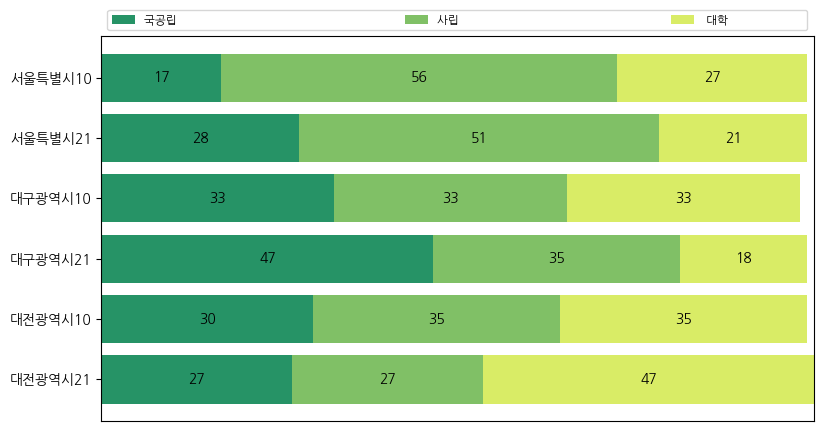

In [24]:
category_names = ['국공립                                                               ', '사립                                                          ',
 ' 대학                       ']
results = {
    '서울특별시10': list(map(lambda x: x*100, seoDF_r.iloc[0,2:].to_list())),
    '서울특별시21': list(map(lambda x: x*100, seoDF_r.iloc[11,2:].to_list())),

    '대구광역시10': list(map(lambda x: x*100, dgDF_r.iloc[0,2:].to_list())),
    '대구광역시21': list(map(lambda x: x*100, dgDF_r.iloc[11,2:].to_list())),
    
    '대전광역시10': list(map(lambda x: x*100, djDF_r.iloc[0,2:].to_list())),
    '대전광역시21': list(map(lambda x: x*100, djDF_r.iloc[11,2:].to_list()))
}
survey(results, category_names)
plt.show()

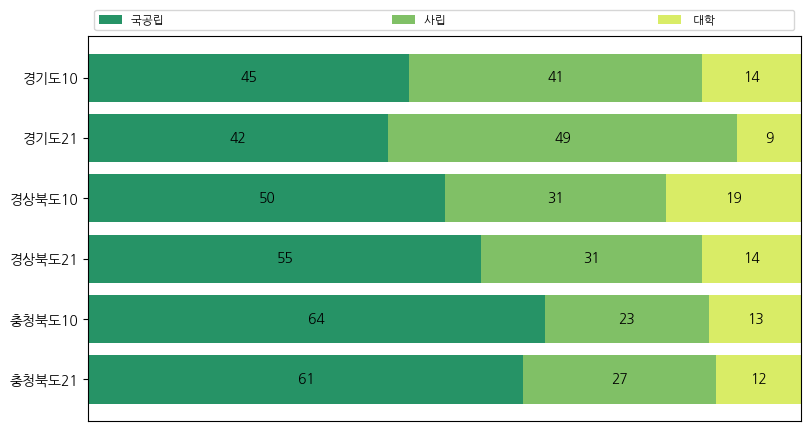

In [25]:
category_names = ['국공립                                                               ', '사립                                                          ',
 ' 대학                       ']
results = {
    '경기도10': list(map(lambda x: x*100, kkdDF_r.iloc[0,2:].to_list())),
    '경기도21': list(map(lambda x: x*100, kkdDF_r.iloc[11,2:].to_list())),
    '경상북도10': list(map(lambda x: x*100, gsbdDF_r.iloc[0,2:].to_list())),
    '경상북도21': list(map(lambda x: x*100, gsbdDF_r.iloc[11,2:].to_list())),
    '충청북도10': list(map(lambda x: x*100, ccbdDF_r.iloc[0,2:].to_list())),
    '충청북도21': list(map(lambda x: x*100, ccbdDF_r.iloc[11,2:].to_list()))
}
survey(results, category_names)
plt.show()

In [26]:
# plt.style.use('ggplot')
# plt.figure(figsize = (10, 5), dpi=300)
# plt.rc('font', family = 'Malgun Gothic')
# plt.rcParams['axes.unicode_minus'] = False
# plt.title(name + ' 지역의 남녀 성별 인구 분포')
# plt.barh(range(101), m, label='남성')
# plt.barh(range(101), f, label='여성')
# plt.legend()
# plt.show()

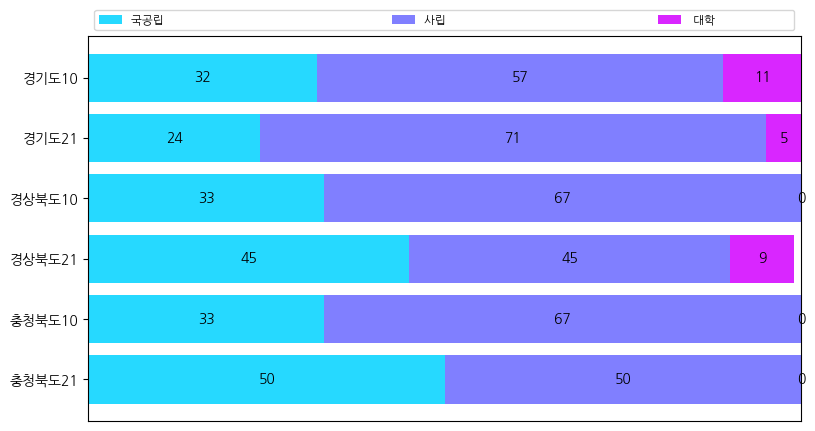

In [27]:
category_names = ['국공립                                                               ', '사립                                                          ',
 ' 대학                       ']
results = {
    '경기도10': list(map(lambda x: x*100, kkdDF_g.iloc[0,2:].to_list())),
    '경기도21': list(map(lambda x: x*100, kkdDF_g.iloc[11,2:].to_list())),
    '경상북도10': list(map(lambda x: x*100, gsbdDF_g.iloc[0,2:].to_list())),
    '경상북도21': list(map(lambda x: x*100, gsbdDF_g.iloc[11,2:].to_list())),
    '충청북도10': list(map(lambda x: x*100, ccbdDF_g.iloc[0,2:].to_list())),
    '충청북도21': list(map(lambda x: x*100, ccbdDF_g.iloc[11,2:].to_list()))
}
survey(results, category_names,cmap='cool')
plt.show()

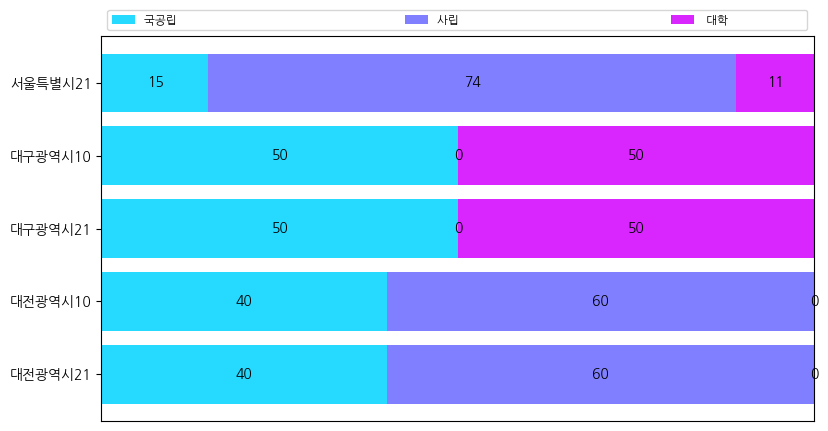

In [28]:
category_names = ['국공립                                                               ', '사립                                                          ',
 ' 대학                       ']
results = {
    '서울특별시21': list(map(lambda x: x*100, seoDF_g.iloc[11,2:].to_list())),

    '대구광역시10': list(map(lambda x: x*100, dgDF_g.iloc[0,2:].to_list())),
    '대구광역시21': list(map(lambda x: x*100, dgDF_g.iloc[11,2:].to_list())),
    
    '대전광역시10': list(map(lambda x: x*100, djDF_g.iloc[0,2:].to_list())),
    '대전광역시21': list(map(lambda x: x*100, djDF_g.iloc[11,2:].to_list()))
}
survey(results, category_names, cmap='cool')
plt.show()

In [29]:
print(seoDF.loc[11,'mu/10k'])
print(djDF.loc[11,'mu/10k'])
print(dgDF.loc[11,'mu/10k'])


0.141
0.103
0.071


In [30]:
print(kkdDF.loc[0,'mu/10k'],popDF.loc[(popDF['years']==2010) & (popDF['region']=='경기도'),'total'])
print(gsbdDF.loc[0,'mu/10k'],popDF.loc[(popDF['years']==2010) & (popDF['region']=='경상북도'),'total'])
print(ccbdDF.loc[0,'mu/10k'],popDF.loc[(popDF['years']==2010) & (popDF['region']=='충청북도'),'total'])

0.078 108    11786622.0
Name: total, dtype: float64
0.268 180    2689920.0
Name: total, dtype: float64
0.252 132    1549528.0
Name: total, dtype: float64


In [31]:
print(kkdDF.loc[11,'mu/10k'],popDF.loc[(popDF['years']==2021) & (popDF['region']=='경기도'),'total'])
print(gsbdDF.loc[11,'mu/10k'],popDF.loc[(popDF['years']==2021) & (popDF['region']=='경상북도'),'total'])
print(ccbdDF.loc[11,'mu/10k'],popDF.loc[(popDF['years']==2021) & (popDF['region']=='충청북도'),'total'])

0.094 119    13565450.0
Name: total, dtype: float64
0.282 191    2626609.0
Name: total, dtype: float64
0.257 143    1597427.0
Name: total, dtype: float64


In [32]:
popDF.loc[(popDF['years']<=2021) & (popDF['years']>=2010) & (popDF['region']=='경기도'),'total']

108    11786622.0
109    11937415.0
110    12093299.0
111    12234630.0
112    12357830.0
113    12522606.0
114    12716780.0
115    12873895.0
116    13077153.0
117    13239666.0
118    13427014.0
119    13565450.0
Name: total, dtype: float64

In [33]:
barDF = kkdDF.copy()
barDF.insert(1, 'bar', popDF.loc[(popDF['years']<=2021) & (popDF['years']>=2010) & (popDF['region']=='경기도'),'total'].tolist())



In [34]:
barDF

,region,bar,years,mu/10k,mu/km^2,museum,museum_pub,museum_pri,museum_col,ga/10k,ga/km^2,gallery,gallery_pu,gallery_pr,gallery_col
0,경기도,11786622.0,2010,0.078,0.009,92,41,38,13,0.024,0.003,28,9,16,3
1,경기도,11937415.0,2011,0.085,0.010,102,39,52,11,0.023,0.003,27,6,21,0
2,경기도,12093299.0,2012,0.102,0.012,123,46,67,10,0.036,0.004,43,9,30,4
3,경기도,12234630.0,2013,0.107,0.013,131,58,63,10,0.035,0.004,43,11,29,3
4,경기도,12357830.0,2014,0.116,0.014,143,60,72,11,0.036,0.004,44,10,31,3
5,경기도,12522606.0,2015,0.111,0.014,139,56,72,11,0.039,0.005,49,10,36,3
6,경기도,12716780.0,2016,0.105,0.013,133,51,71,11,0.041,0.005,52,10,38,4
7,경기도,12873895.0,2017,0.109,0.014,140,55,10,75,0.042,0.005,54,12,38,4
8,경기도,13077153.0,2018,0.104,0.013,136,51,74,11,0.041,0.005,53,12,36,5
9,경기도,13239666.0,2019,0.091,0.012,120,46,63,11,0.040,0.005,53,11,39,3


<Figure size 1200x600 with 0 Axes>

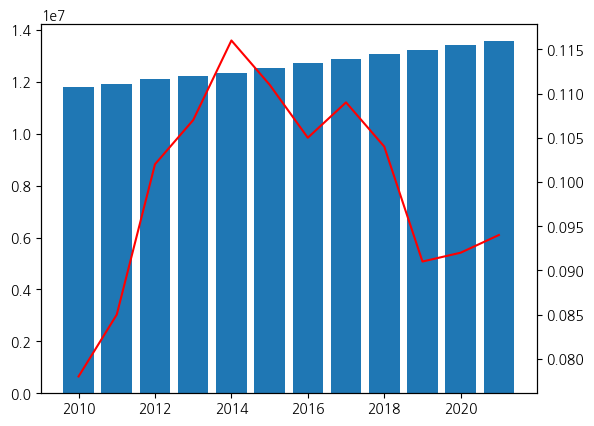

In [35]:
plt.figure(figsize=(12,6))
fig, ax1 = plt.subplots()
ax1.bar(kkdDF['years'], barDF['bar'])
ax2 = ax1.twinx()
ax2.plot(kkdDF['years'], kkdDF['mu/10k'], 'red')

<Figure size 1200x600 with 0 Axes>

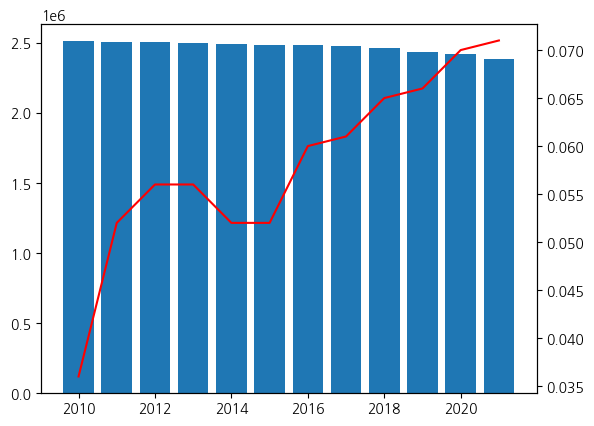

In [36]:
barDF = dgDF.copy()
barDF.insert(1, 'bar', popDF.loc[(popDF['years']<=2021) & (popDF['years']>=2010) & (popDF['region']=='대구광역시'),'total'].tolist())

plt.figure(figsize=(12,6))
fig, ax1 = plt.subplots()
ax1.bar(dgDF['years'], barDF['bar'])
ax2 = ax1.twinx()
ax2.plot(dgDF['years'], dgDF['mu/10k'], 'red')


<Figure size 1200x600 with 0 Axes>

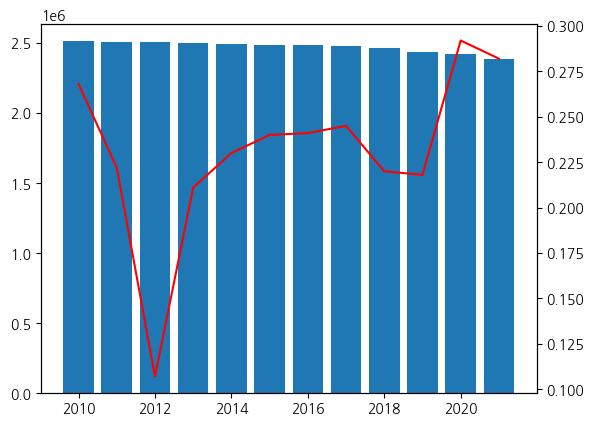

In [37]:
barDF = gsbdDF.copy()
barDF.insert(1, 'bar', popDF.loc[(popDF['years']<=2021) & (popDF['years']>=2010) & (popDF['region']=='대구광역시'),'total'].tolist())

plt.figure(figsize=(12,6))
fig, ax1 = plt.subplots()
ax1.bar(gsbdDF['years'], barDF['bar'])
ax2 = ax1.twinx()
ax2.plot(gsbdDF['years'], gsbdDF['mu/10k'], 'red')


<Figure size 1200x600 with 0 Axes>

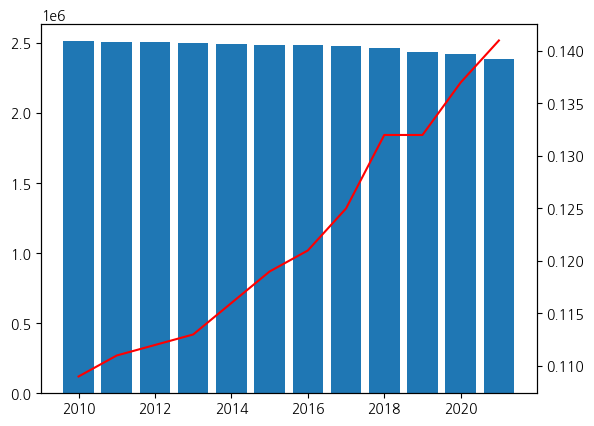

In [38]:
barDF = seoDF.copy()
barDF.insert(1, 'bar', popDF.loc[(popDF['years']<=2021) & (popDF['years']>=2010) & (popDF['region']=='대구광역시'),'total'].tolist())

plt.figure(figsize=(12,6))
fig, ax1 = plt.subplots()
ax1.bar(seoDF['years'], barDF['bar'])
ax2 = ax1.twinx()
ax2.plot(seoDF['years'], seoDF['mu/10k'], 'red')


In [39]:
ccbdDF

,region,years,mu/10k,mu/km^2,museum,museum_pub,museum_pri,museum_col,ga/10k,ga/km^2,gallery,gallery_pu,gallery_pr,gallery_col
0,충청북도,2010,0.252,0.005,39,25,9,5,0.039,0.001,6,2,4,0
1,충청북도,2011,0.262,0.006,41,26,9,6,0.045,0.001,7,2,5,0
2,충청북도,2012,0.275,0.006,43,26,9,8,0.045,0.001,7,2,5,0
3,충청북도,2013,0.261,0.006,41,28,7,6,0.045,0.001,7,2,5,0
4,충청북도,2014,0.266,0.006,42,28,8,6,0.044,0.001,7,2,5,0
5,충청북도,2015,0.278,0.006,44,28,10,6,0.051,0.001,8,3,5,0
6,충청북도,2016,0.264,0.006,42,25,11,6,0.063,0.001,10,5,5,0
7,충청북도,2017,0.263,0.006,42,25,11,6,0.063,0.001,10,5,5,0
8,충청북도,2018,0.281,0.006,45,27,13,5,0.069,0.001,11,5,6,0
9,충청북도,2019,0.281,0.006,45,27,13,5,0.069,0.001,11,5,6,0


<Figure size 1200x600 with 0 Axes>

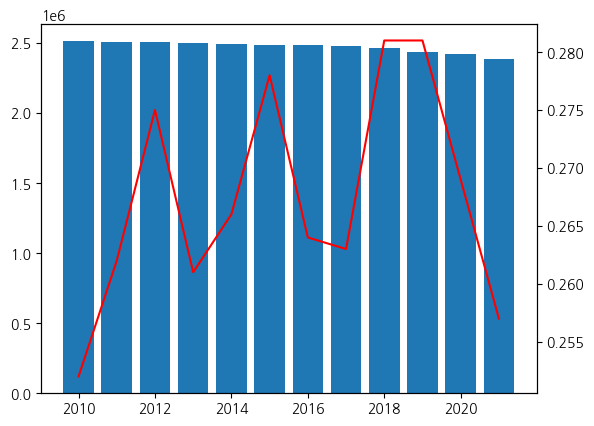

In [40]:
barDF = ccbdDF.copy()
barDF.insert(1, 'bar', popDF.loc[(popDF['years']<=2021) & (popDF['years']>=2010) & (popDF['region']=='대구광역시'),'total'].tolist())

plt.figure(figsize=(12,6))
fig, ax1 = plt.subplots()
ax1.bar(ccbdDF['years'], barDF['bar'])
ax2 = ax1.twinx()
ax2.plot(ccbdDF['years'], ccbdDF['mu/10k'], 'red')
